In [13]:
# Upload Dataset
import kagglehub
import os

path = kagglehub.dataset_download("devarajv88/walmart-sales-dataset")
print("Path to dataset files:", path)

for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))

# Remove warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)

Path to dataset files: C:\Users\chrde\.cache\kagglehub\datasets\devarajv88\walmart-sales-dataset\versions\1
C:\Users\chrde\.cache\kagglehub\datasets\devarajv88\walmart-sales-dataset\versions\1\walmart.csv


In [3]:
# Import relevant modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import networkx as nx

#Set row and columns size
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
# Import the data
df = pd.read_csv(os.path.join(path, 'walmart.csv'),usecols=['User_ID','Product_ID','Purchase'])
df.info(memory_usage='deep')
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   User_ID     550068 non-null  int64 
 1   Product_ID  550068 non-null  object
 2   Purchase    550068 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 38.8 MB


,User_ID,Product_ID,Purchase
0,1000001,P00069042,8370
1,1000001,P00248942,15200
2,1000001,P00087842,1422
3,1000001,P00085442,1057
4,1000002,P00285442,7969


In [5]:
# Get percent of null values
df.isnull().sum()/df.shape[0]

User_ID       0.0
Product_ID    0.0
Purchase      0.0
dtype: float64

In [6]:
# Basket grouping (1 = bought, 0 = not bought)
basket = df.groupby(['User_ID', 'Product_ID'])['Purchase'].sum().unstack().reset_index().fillna(0).set_index('User_ID')
basket

Product_ID,P00000142,P00000242,P00000342,P00000442,P00000542,P00000642,P00000742,P00000842,P00000942,P00001042,P00001142,P00001242,P00001342,P00001442,P00001542,P00001642,P00001742,P00001842,P00001942,P00002042,P00002142,P00002242,P00002342,P00002442,P00002542,P00002642,P00002742,P00002842,P00002942,P00003042,P00003142,P00003242,P00003342,P00003442,P00003542,P00003642,P00003742,P00003842,P00003942,P00004042,P00004142,P00004242,P00004342,P00004442,P00004542,P00004642,P00004742,P00004842,P00004942,P00005042,P00005142,P00005242,P00005342,P00005442,P00005542,P00005642,P00005742,P00005842,P00005942,P00006042,P00006142,P00006242,P00006342,P00006442,P00006542,P00006642,P00006742,P00006842,P00006942,P00007042,P00007142,P00007242,P00007342,P00007442,P00007542,P00007642,P00007742,P00007842,P00007942,P00008042,P00008142,P00008242,P00008342,P00008442,P00008542,P00008642,P00008742,P00008842,P00008942,P00009042,P00009142,P00009242,P00009342,P00009442,P00009542,P00009642,P00009742,P00010042,P00010142,P00010242,P00010342,P00010442,P00010542,P00010642,P00010742,P00010842,P00010942,P00011042,P00011142,P00011242,P00011342,P00011442,P00011542,P00011642,P00011742,P00011842,P00011942,P00012042,P00012142,P00012242,P00012342,P00012442,P00012542,P00012742,P00012842,P00012942,P00013142,P00013242,P00013342,P00013442,P00013542,P00013642,P00013742,P00013842,P00013942,P00014042,P00014142,P00014242,P00014342,P00014442,P00014542,P00014642,P00014742,P00014842,P00014942,P00015042,P00015142,P00015242,P00015342,P00015442,P00015542,P00015642,P00015742,P00015842,P00015942,P00016042,P00016142,P00016242,P00016342,P00016442,P00016542,P00016642,P00016742,P00016842,P00016942,P00017042,P00017142,P00017242,P00017342,P00017442,P00017542,P00017642,P00017742,P00017842,P00017942,P00018042,P00018142,P00018242,P00018342,P00018442,P00018542,P00018642,P00018742,P00018842,P00018942,P00019042,P00019142,P00019242,P00019342,P00019442,P00019542,P00019642,P00019742,P00019842,P00019942,P00020042,P00020142,P00020242,P00020342,P00020442,P00020542,P00020642,P00020742,P00020842,P00020942,P00021042,P00021142,P00021242,P00021342,P00021442,P00021542,P00021642,P00021742,P00021842,P00021942,P00022042,P00022142,P00022242,P00022342,P00022442,P00022542,P00022642,P00022742,P00022842,P00022942,P00023042,P00023142,P00023242,P00023342,P00023442,P00023542,P00023642,P00023742,P00023842,P00023942,P00024042,P00024142,P00024242,P00024342,P00024442,P00024542,P00024642,P00024742,P00024842,P00024942,P00025042,P00025142,P00025242,P00025342,P00025442,...,P00352242,P00352342,P00352442,P00352542,P00352642,P00352742,P00352842,P00352942,P00353042,P00353142,P00353242,P00353342,P00353442,P00353542,P00353642,P00353742,P00353842,P00353942,P00354042,P00354142,P00354242,P00354342,P00354442,P00354542,P00354642,P00354742,P00354842,P00354942,P00355042,P00355142,P00355242,P00355342,P00355442,P00355542,P00355642,P00355742,P00355842,P00355942,P00356042,P00356142,P00356242,P00356342,P00356442,P00356542,P00356642,P00356742,P00356842,P00356942,P00357042,P00357142,P00357242,P00357342,P00357442,P00357542,P00357642,P00357742,P00357842,P00357942,P00358042,P00358142,P00358242,P00358342,P00358442,P00358542,P00358642,P00358742,P00358842,P00358942,P00359042,P00359142,P00359242,P00359342,P00359442,P00359542,P00359642,P00359742,P00359942,P00360042,P00360142,P00360242,P00360342,P00360442,P00360542,P00360642,P00360742,P00360842,P00360942,P00361042,P00361142,P00361242,P00361342,P00361442,P00361542,P00361642,P00361742,P00361842,P00361942,P00362042,P00362142,P00362242,P00362342,P00362442,P00362542,P00362642,P00362742,P00362842,P00362942,P00363042,P00363142,P00363242,P00363342,P00363442,P00363542,P00363742,P00363842,P00363942,P00364042,P00364142,P00364242,P00364342,P00364442,P00364542,P00364642,P00364742,P00364842,P00364942,P00365042,P00365142,P00365242,P00365342,P00365442,P00365542,P00365642,P00365742,P00365842,P00365942,P00366042,P00366142,P00366242,P00366342,P00366442,P00366542,P00366642,P00366742,P00366842,P00366942,P00367042,P00367142,P0036

In [7]:
# define encoding (1 for bought & 0 for not bought)
def encode(x):
    if x <= 0:
        return 0
    if x > 0:
        return 1
basket_sets = basket.applymap(encode)
basket_sets

Product_ID,P00000142,P00000242,P00000342,P00000442,P00000542,P00000642,P00000742,P00000842,P00000942,P00001042,P00001142,P00001242,P00001342,P00001442,P00001542,P00001642,P00001742,P00001842,P00001942,P00002042,P00002142,P00002242,P00002342,P00002442,P00002542,P00002642,P00002742,P00002842,P00002942,P00003042,P00003142,P00003242,P00003342,P00003442,P00003542,P00003642,P00003742,P00003842,P00003942,P00004042,P00004142,P00004242,P00004342,P00004442,P00004542,P00004642,P00004742,P00004842,P00004942,P00005042,P00005142,P00005242,P00005342,P00005442,P00005542,P00005642,P00005742,P00005842,P00005942,P00006042,P00006142,P00006242,P00006342,P00006442,P00006542,P00006642,P00006742,P00006842,P00006942,P00007042,P00007142,P00007242,P00007342,P00007442,P00007542,P00007642,P00007742,P00007842,P00007942,P00008042,P00008142,P00008242,P00008342,P00008442,P00008542,P00008642,P00008742,P00008842,P00008942,P00009042,P00009142,P00009242,P00009342,P00009442,P00009542,P00009642,P00009742,P00010042,P00010142,P00010242,P00010342,P00010442,P00010542,P00010642,P00010742,P00010842,P00010942,P00011042,P00011142,P00011242,P00011342,P00011442,P00011542,P00011642,P00011742,P00011842,P00011942,P00012042,P00012142,P00012242,P00012342,P00012442,P00012542,P00012742,P00012842,P00012942,P00013142,P00013242,P00013342,P00013442,P00013542,P00013642,P00013742,P00013842,P00013942,P00014042,P00014142,P00014242,P00014342,P00014442,P00014542,P00014642,P00014742,P00014842,P00014942,P00015042,P00015142,P00015242,P00015342,P00015442,P00015542,P00015642,P00015742,P00015842,P00015942,P00016042,P00016142,P00016242,P00016342,P00016442,P00016542,P00016642,P00016742,P00016842,P00016942,P00017042,P00017142,P00017242,P00017342,P00017442,P00017542,P00017642,P00017742,P00017842,P00017942,P00018042,P00018142,P00018242,P00018342,P00018442,P00018542,P00018642,P00018742,P00018842,P00018942,P00019042,P00019142,P00019242,P00019342,P00019442,P00019542,P00019642,P00019742,P00019842,P00019942,P00020042,P00020142,P00020242,P00020342,P00020442,P00020542,P00020642,P00020742,P00020842,P00020942,P00021042,P00021142,P00021242,P00021342,P00021442,P00021542,P00021642,P00021742,P00021842,P00021942,P00022042,P00022142,P00022242,P00022342,P00022442,P00022542,P00022642,P00022742,P00022842,P00022942,P00023042,P00023142,P00023242,P00023342,P00023442,P00023542,P00023642,P00023742,P00023842,P00023942,P00024042,P00024142,P00024242,P00024342,P00024442,P00024542,P00024642,P00024742,P00024842,P00024942,P00025042,P00025142,P00025242,P00025342,P00025442,...,P00352242,P00352342,P00352442,P00352542,P00352642,P00352742,P00352842,P00352942,P00353042,P00353142,P00353242,P00353342,P00353442,P00353542,P00353642,P00353742,P00353842,P00353942,P00354042,P00354142,P00354242,P00354342,P00354442,P00354542,P00354642,P00354742,P00354842,P00354942,P00355042,P00355142,P00355242,P00355342,P00355442,P00355542,P00355642,P00355742,P00355842,P00355942,P00356042,P00356142,P00356242,P00356342,P00356442,P00356542,P00356642,P00356742,P00356842,P00356942,P00357042,P00357142,P00357242,P00357342,P00357442,P00357542,P00357642,P00357742,P00357842,P00357942,P00358042,P00358142,P00358242,P00358342,P00358442,P00358542,P00358642,P00358742,P00358842,P00358942,P00359042,P00359142,P00359242,P00359342,P00359442,P00359542,P00359642,P00359742,P00359942,P00360042,P00360142,P00360242,P00360342,P00360442,P00360542,P00360642,P00360742,P00360842,P00360942,P00361042,P00361142,P00361242,P00361342,P00361442,P00361542,P00361642,P00361742,P00361842,P00361942,P00362042,P00362142,P00362242,P00362342,P00362442,P00362542,P00362642,P00362742,P00362842,P00362942,P00363042,P00363142,P00363242,P00363342,P00363442,P00363542,P00363742,P00363842,P00363942,P00364042,P00364142,P00364242,P00364342,P00364442,P00364542,P00364642,P00364742,P00364842,P00364942,P00365042,P00365142,P00365242,P00365342,P00365442,P00365542,P00365642,P00365742,P00365842,P00365942,P00366042,P00366142,P00366242,P00366342,P00366442,P00366542,P00366642,P00366742,P00366842,P00366942,P00367042,P00367142,P0036

In [14]:
# Find frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.06, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules = rules.sort_values(by='lift', ascending=False)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1099,(P00329542),(P00114942),0.120183,0.199966,0.063317,0.526836,2.634628,1.0,0.039284,1.690818,0.705192,0.246530,0.408570,0.421737
1098,(P00114942),(P00329542),0.199966,0.120183,0.063317,0.316638,2.634628,1.0,0.039284,1.287483,0.775517,0.246530,0.223291,0.421737
1169,(P00140742),(P00270942),0.135121,0.195553,0.065693,0.486181,2.486191,1.0,0.039270,1.565624,0.691170,0.247918,0.361277,0.411059
1168,(P00270942),(P00140742),0.195553,0.135121,0.065693,0.335938,2.486191,1.0,0.039270,1.302405,0.743092,0.247918,0.232190,0.411059
378,(P00044442),(P00036842),0.188593,0.150059,0.069598,0.369037,2.459272,1.0,0.041298,1.347053,0.731292,0.258675,0.257639,0.416419
379,(P00036842),(P00044442),0.150059,0.188593,0.069598,0.463801,2.459272,1.0,0.041298,1.513257,0.698138,0.258675,0.339174,0.416419
1100,(P00114942),(P0097242),0.199966,0.154812,0.072314,0.361630,2.335923,1.0,0.041356,1.323977,0.714849,0.256010,0.244700,0.414368
1101,(P0097242),(P00114942),0.154812,0.199966,0.072314,0.467105,2.335923,1.0,0.041356,1.501298,0.676659,0.256010,0.333910,0.414368
758,(P00080342),(P00113242),0.204210,0.158377,0.074351,0.364090,2.298878,1.0,0.042009,1.323493,0.709993,0.257951,0.244424,0.416772
759,(P00113242),(P00080342),0.158377,0.204210,0.074351,0.469453,2.298878,1.0,0.042009,1.499944,0.671328,0.257951,0.333308,0.416772


In [19]:
filtered_rules = rules[ (rules['lift'] >= 1) &
    (rules['confidence'] >= 0.5) ]
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1099,(P00329542),(P00114942),0.120183,0.199966,0.063317,0.526836,2.634628,1.0,0.039284,1.690818,0.705192,0.246530,0.408570,0.421737
967,(P00120042),(P00110942),0.153115,0.230861,0.079273,0.517738,2.242645,1.0,0.043925,1.594859,0.654278,0.260167,0.372985,0.430560
1164,(P00140742),(P00145042),0.135121,0.238669,0.069258,0.512563,2.147587,1.0,0.037009,1.561906,0.617845,0.227425,0.359756,0.401374
1162,(P00125942),(P00145042),0.123069,0.238669,0.061789,0.502069,2.103619,1.0,0.032416,1.528989,0.598255,0.205999,0.345973,0.380480
618,(P00270942),(P00057642),0.195553,0.249533,0.098116,0.501736,2.010699,1.0,0.049319,1.506163,0.624852,0.282779,0.336061,0.447467
191,(P00111742),(P00025442),0.116958,0.274147,0.060940,0.521045,1.900604,1.0,0.028877,1.515493,0.536613,0.184576,0.340149,0.371668
233,(P00243942),(P00025442),0.116788,0.274147,0.060771,0.520349,1.898065,1.0,0.028753,1.513294,0.535713,0.184062,0.339190,0.371010
629,(P00057942),(P00110742),0.133254,0.273638,0.068579,0.514650,1.880770,1.0,0.032116,1.496573,0.540300,0.202709,0.331807,0.382635
909,(P00329542),(P00110742),0.120183,0.273638,0.060601,0.504237,1.842718,1.0,0.027714,1.465141,0.519794,0.181864,0.317472,0.362851


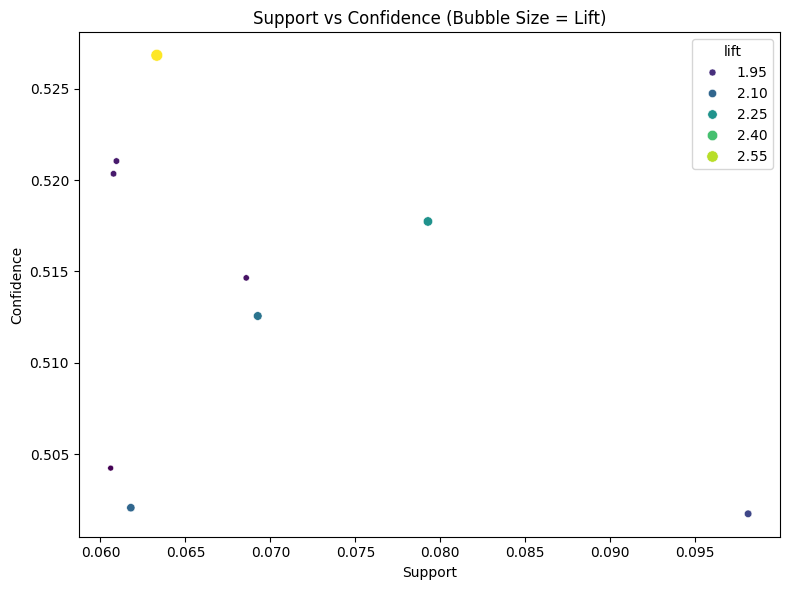

In [20]:
# Support and confidence correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_rules, x='support', y='confidence', size='lift', hue='lift', palette='viridis', legend=True)
plt.title('Support vs Confidence (Bubble Size = Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.tight_layout()
plt.show()

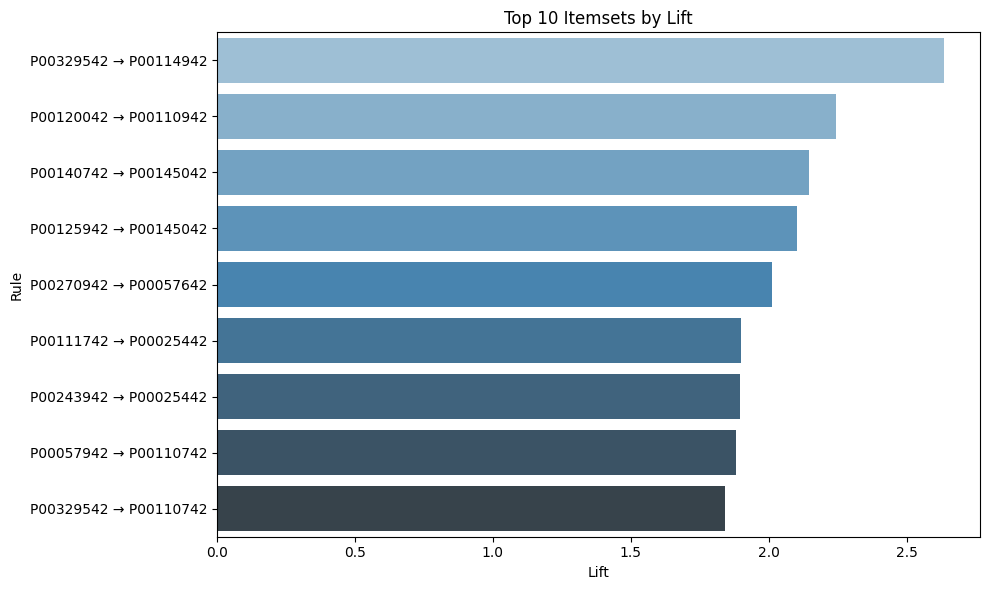

In [21]:
# Itemsets ordered by lift
filtered_rules['rule'] = filtered_rules['antecedents'].apply(lambda x: ', '.join(x)) + " → " + \
                       filtered_rules['consequents'].apply(lambda x: ', '.join(x))

plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_rules, x='lift', y='rule', palette='Blues_d')
plt.title('Top 10 Itemsets by Lift')
plt.xlabel('Lift')
plt.ylabel('Rule')
plt.tight_layout()
plt.show()

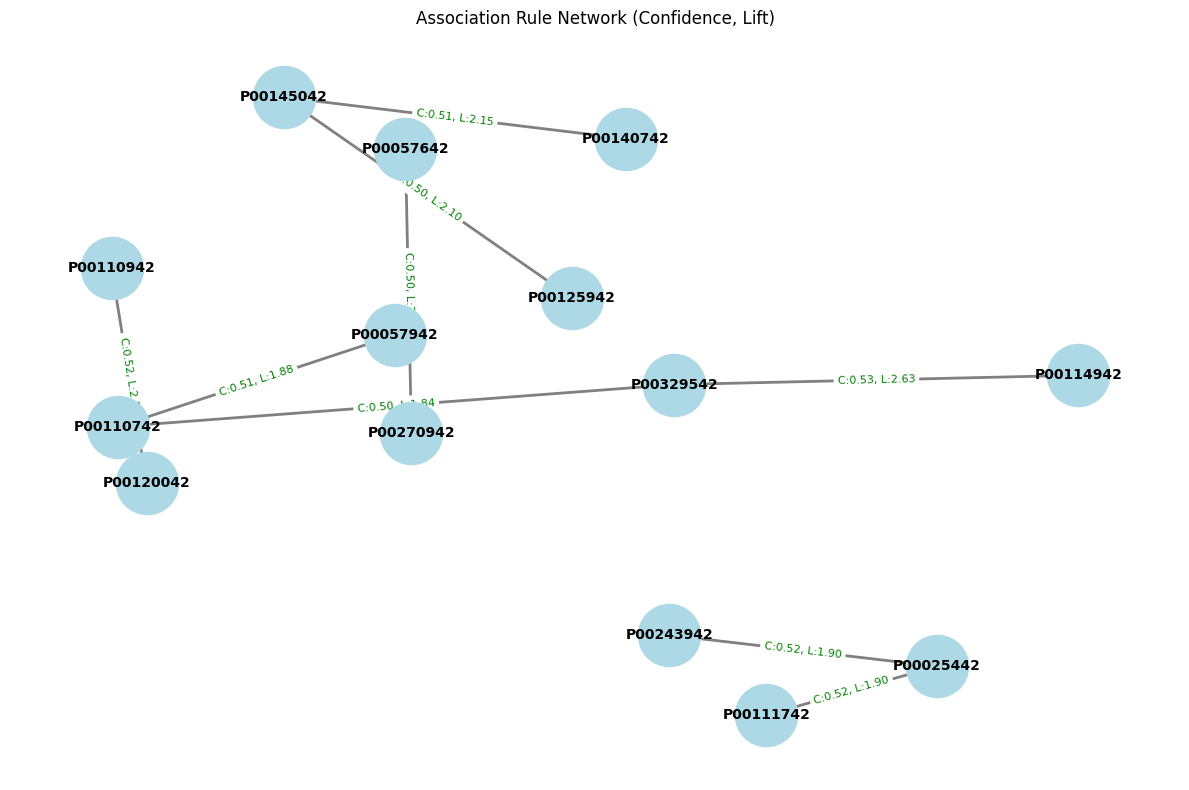

In [22]:
# Network graph of itemsets
def to_str(x):
    return ', '.join(list(x))

# Initialize the graph
G = nx.DiGraph()

# Add edges with lift as edge attribute
for _, row in filtered_rules.iterrows():
    from_item = to_str(row['antecedents'])
    to_item = to_str(row['consequents'])
    lift = row['lift']
    confidence = row['confidence']
    
    # Add edge with lift and confidence as attributes
    G.add_edge(from_item, to_item, weight=lift, confidence=confidence)

# Position the nodes using a spring layout
pos = nx.spring_layout(G, k=1, seed=42)

# Draw the graph
plt.figure(figsize=(12, 8))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')

# Draw edges
edges = G.edges(data=True)
weights = [d['weight'] for (_, _, d) in edges]
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, width=2)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Optionally add lift labels on edges
edge_labels = {(u, v): f"C:{d['confidence']:.2f}, L:{d['weight']:.2f}" for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green', font_size=8)

plt.title('Association Rule Network (Confidence, Lift)')
plt.axis('off')
plt.tight_layout()
plt.show()
